# Potęgowanie 7^x mod 15

In [52]:
# from qiskit import QuantumCircuit
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi

In [53]:
from qiskit import Aer, transpile
from qiskit import assemble

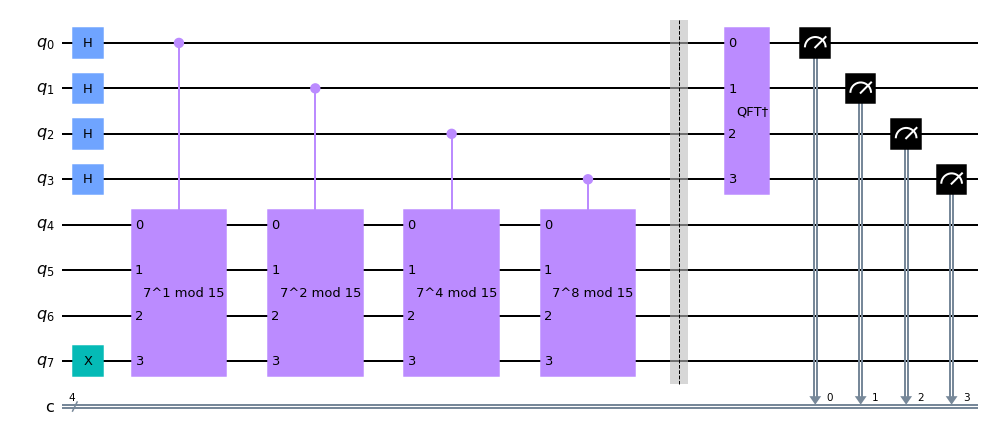

In [54]:
def c_mod15(a, power):
    U = QuantumCircuit(4)
    
    # Liczymy mod 15 dla 7x
    for i in range(power):
        U.swap(2, 3)
        U.swap(1, 2)
        U.swap(0, 1)
        
    U = U.to_gate()
    U.name = "%i^%i mod 15" % (a, power)
    
    c_U = U.control()
    return c_U

def qft_dagger(n):
    """n-qubit QFTdagger the first n qubits in circ"""
    qc = QuantumCircuit(n)
    # Don't forget the Swaps!
    for qubit in range(n//2):
        qc.swap(qubit, n-qubit-1)
    for j in range(n):
        for m in range(j):
            qc.cp(-pi/float(2**(j-m)), m, j)
        qc.h(j)
    qc.name = "QFT†"
    return qc



n_count = 4
a = 7

q = QuantumCircuit(n_count + 4, n_count)

for j in range(n_count):
    q.h(j)
    
q.x(3 + n_count)

for j in range(n_count):
    q.append(c_mod15(a, 2**j), 
             [j] + [i+n_count for i in range(4)])

q.barrier()
q.append(qft_dagger(n_count), range(n_count))


# q.measure_all()
for i in range(n_count):
    q.measure(i,i)


q.draw(output='mpl')


{'1100': 246, '1000': 261, '0100': 259, '0000': 258}


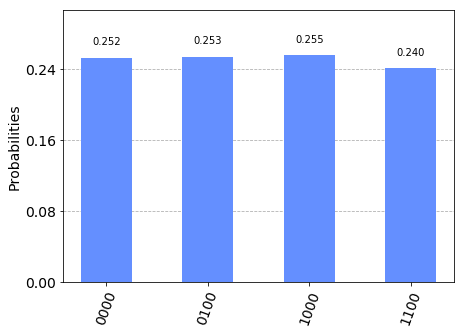

In [55]:
sym = Aer.get_backend('aer_simulator')
t_qc = transpile(q, sym)

qobj = assemble(t_qc)

wyniki = sym.run(qobj)

hist = wyniki.result().get_counts()
print(hist)

from qiskit.visualization import plot_histogram

plot_histogram(hist)